In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sensitivities.stochastic import Fixed, Gaussian, Uniform, sample

stochastic uncertainty propagation with correlations

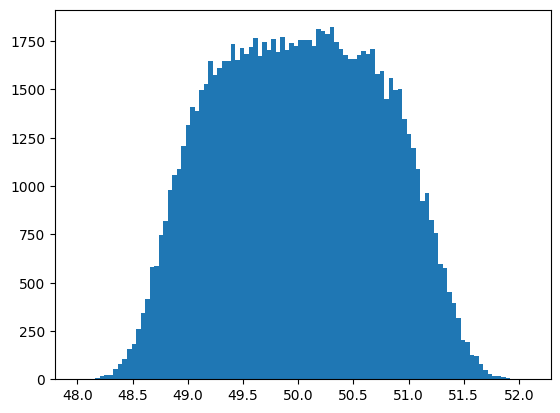

standard dev.: 0.733


In [ ]:
# function to be sampled
def calibrate_signal(signal, gain, offset):
    return (signal - offset) / gain


# distributions for function parameters
parameters = [
    Fixed(100),
    Gaussian(2, 0.01),  # gain uncertainty
    Uniform(-2, 2),  # offset uncertainty
]

# correlation between function parameters
corr = [("gain", "offset", 0.5)]


# monte carlo uncertainty propagation
samples = sample(
    calibrate_signal,
    parameters,
    corr=corr,
    n=100000,
)

plt.hist(np.array(samples), 100)
plt.show()

print(f"standard dev.: {np.std(samples):1.3f}")

compare to uncertainty propagation from linear sensitivities 

In [7]:
from sensitivities.linear import propagate_uncertainties

f_uncertainty = propagate_uncertainties(
    calibrate_signal,
    uncertainties=[p.std() for p in parameters],
    x0=[p.mean() for p in parameters],
    corr=[[1, 0, 0], [0, 1, corr[0][2]], [0, corr[0][2], 1]],
)
print(f"linearly propagated uncertainty (1sigma): {f_uncertainty:1.3f}")

linearly propagated uncertainty (1sigma): 0.735
